In [ ]:
# Loading and Exploring The Data

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('Housing.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (545, 13)

First 5 rows:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
print("Data Types:")
print(df.dtypes)

Data Types:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [3]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [ ]:
# Visualization

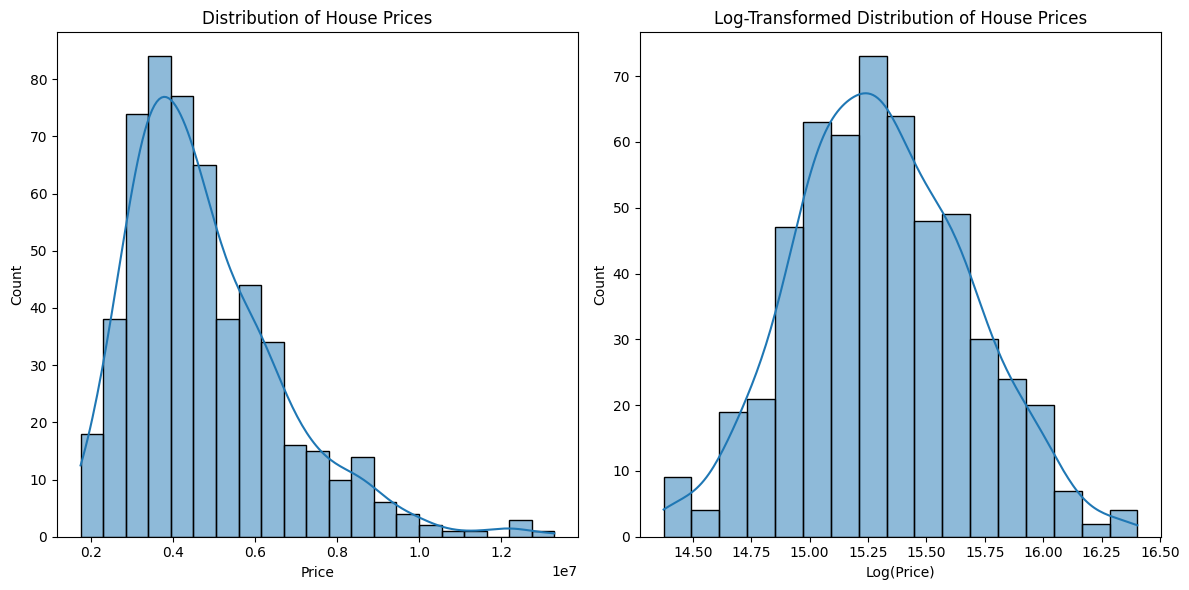

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable of price
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True)
plt.title('Log-Transformed Distribution of House Prices')
plt.xlabel('Log(Price)')

plt.tight_layout()
plt.show()

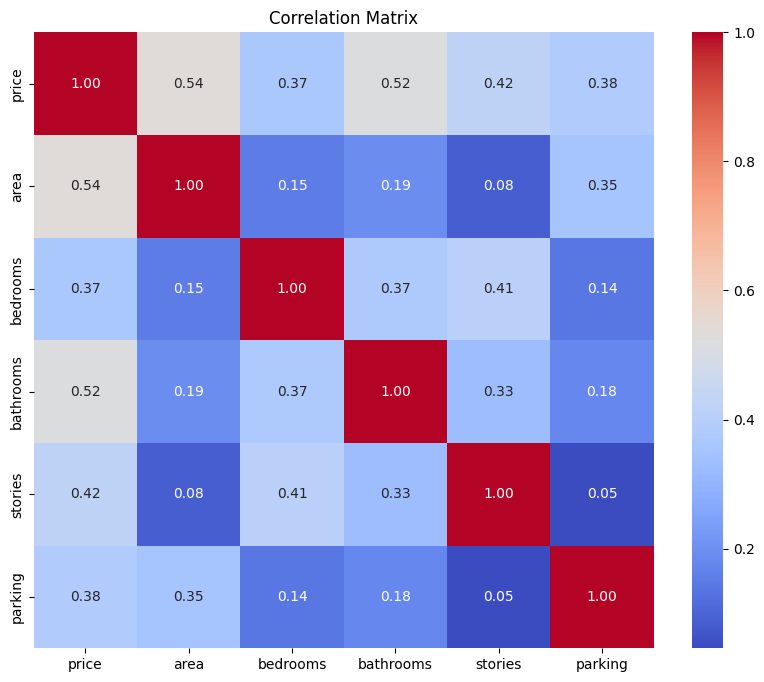

In [10]:
# Correlation matrix
corr_matrix = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

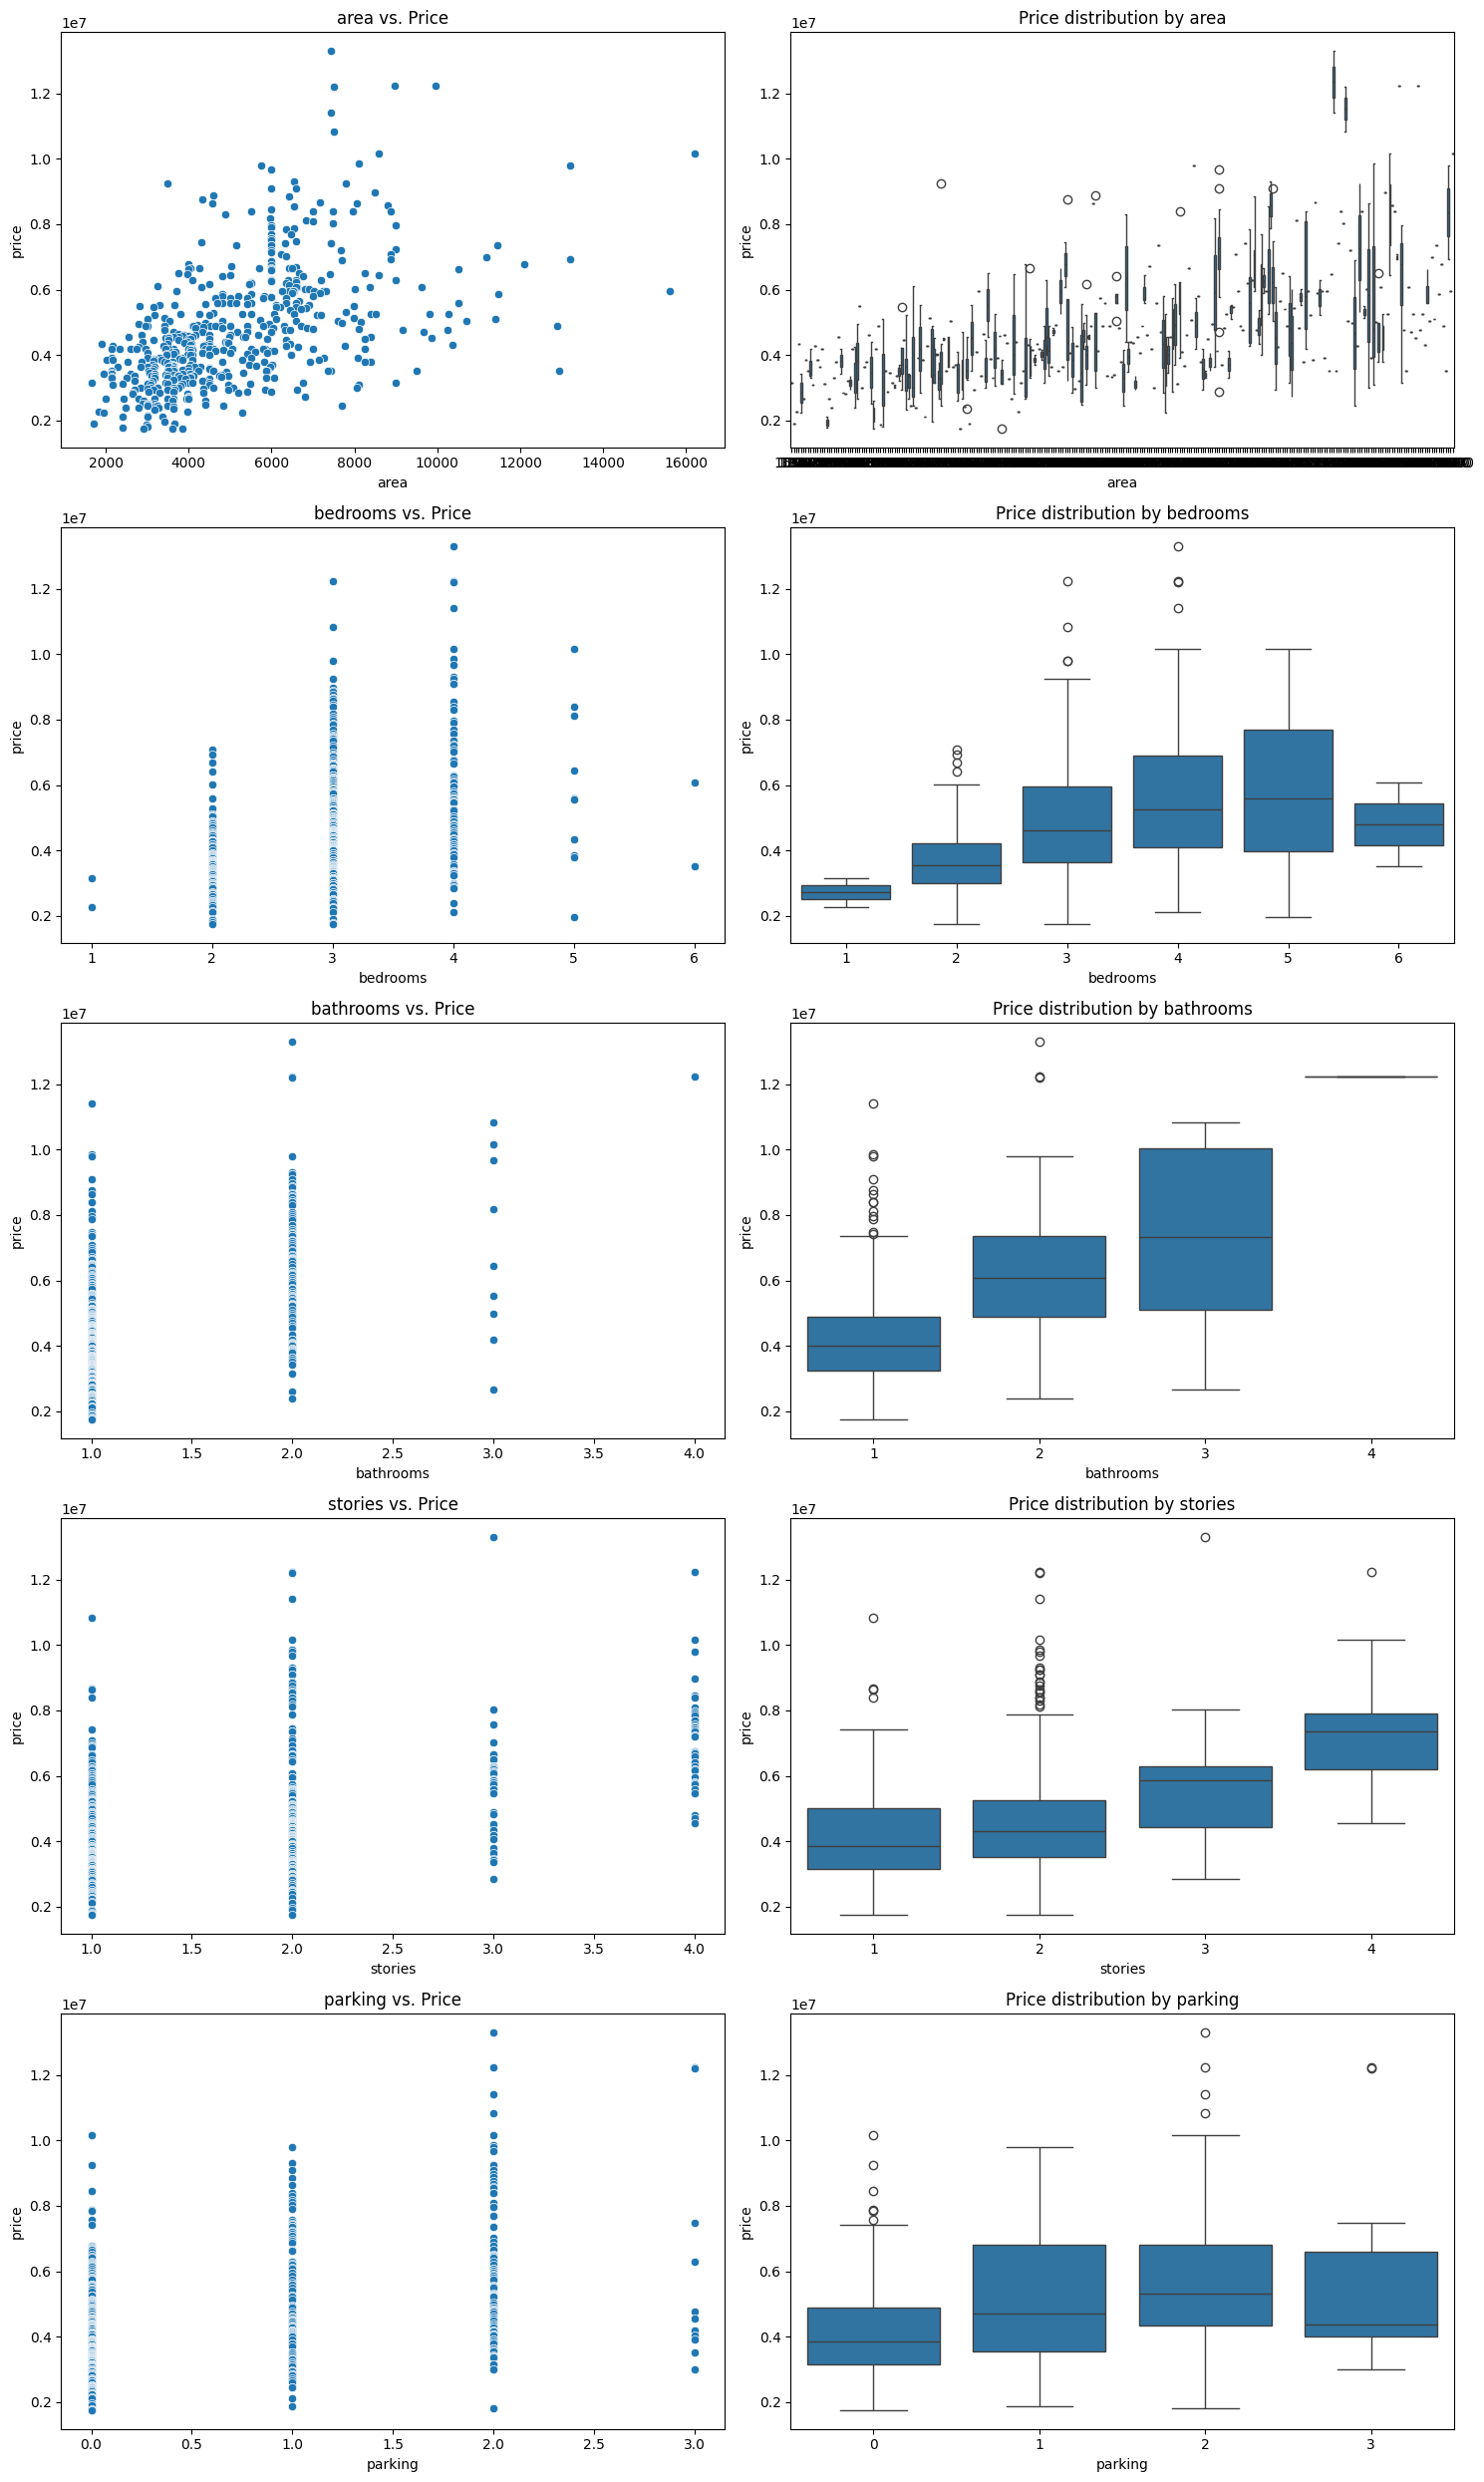

In [11]:
# Relationship between numerical features and the target variable
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

fig, axes = plt.subplots(len(numerical_features), 2, figsize=(15, 5*len(numerical_features)))

for i, feature in enumerate(numerical_features):
    sns.scatterplot(x=feature, y='price', data=df, ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} vs. Price')

    sns.boxplot(x=feature, y='price', data=df, ax=axes[i, 1])
    axes[i, 1].set_title(f'Price distribution by {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# Feature Engineering

In [13]:
df_fe = df.copy()

binary_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for feature in binary_features:
    df_fe[feature] = df_fe[feature].map({'yes': 1, 'no': 0})

df_fe.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [16]:
# Handle ordinal feature: furnishingstatus
furnishing_order = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
df_fe['furnishingstatus_ordinal'] = df_fe['furnishingstatus'].map(furnishing_order)

furnishing_dummies = pd.get_dummies(df_fe['furnishingstatus'], prefix='furnishing')
df_fe = pd.concat([df_fe, furnishing_dummies], axis=1)

df_fe[['furnishingstatus', 'furnishingstatus_ordinal',
       'furnishing_unfurnished', 'furnishing_semi-furnished', 'furnishing_furnished']].head()

,furnishingstatus,furnishingstatus_ordinal,furnishing_unfurnished,furnishing_unfurnished,furnishing_semi-furnished,furnishing_semi-furnished,furnishing_furnished,furnishing_furnished
0,furnished,2,False,False,False,False,True,True
1,furnished,2,False,False,False,False,True,True
2,semi-furnished,1,False,False,True,True,False,False
3,furnished,2,False,False,False,False,True,True
4,furnished,2,False,False,False,False,True,True


In [17]:
# Interaction terms

df_fe['area_per_bedroom'] = df_fe['area'] / df_fe['bedrooms']

df_fe['total_rooms'] = df_fe['bedrooms'] + df_fe['bathrooms']

df_fe['premium_property'] = ((df_fe['airconditioning'] == 1) &
                            (df_fe['prefarea'] == 1) &
                            (df_fe['furnishingstatus_ordinal'] == 2)).astype(int)

df_fe['area_prefarea'] = df_fe['area'] * df_fe['prefarea']

df_fe['stories_area'] = df_fe['stories'] * df_fe['area']

df_fe[['area_per_bedroom', 'total_rooms', 'premium_property', 'area_prefarea', 'stories_area']].head()

,area_per_bedroom,total_rooms,premium_property,area_prefarea,stories_area
0,1855.0,6,1,7420,22260
1,2240.0,8,0,0,35840
2,3320.0,5,0,9960,19920
3,1875.0,6,1,7500,15000
4,1855.0,5,0,0,14840
